Test cluster

In [58]:
import os 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import xarray as xr

In [59]:
# print current path
print(os.getcwd())

/mnt/d/Dropbox/R_projects/SV_phenology/R


In [60]:
# define path in data/chl_4km_nc 
path  = "/mnt/d/Dropbox/R_projects/SV_phenology/data/chl_4km_nc/"

# lf as list of all files in path
lf = os.listdir(path)


print(lf)


['OCEANCOLOUR_ARC_CHL_L4_1998.nc', 'OCEANCOLOUR_ARC_CHL_L4_1999.nc', 'OCEANCOLOUR_ARC_CHL_L4_2000.nc', 'OCEANCOLOUR_ARC_CHL_L4_2001.nc', 'OCEANCOLOUR_ARC_CHL_L4_2002.nc', 'OCEANCOLOUR_ARC_CHL_L4_2003.nc', 'OCEANCOLOUR_ARC_CHL_L4_2004.nc', 'OCEANCOLOUR_ARC_CHL_L4_2005.nc', 'OCEANCOLOUR_ARC_CHL_L4_2006.nc', 'OCEANCOLOUR_ARC_CHL_L4_2007.nc', 'OCEANCOLOUR_ARC_CHL_L4_2008.nc', 'OCEANCOLOUR_ARC_CHL_L4_2009.nc', 'OCEANCOLOUR_ARC_CHL_L4_2010.nc', 'OCEANCOLOUR_ARC_CHL_L4_2011.nc', 'OCEANCOLOUR_ARC_CHL_L4_2012.nc', 'OCEANCOLOUR_ARC_CHL_L4_2013.nc', 'OCEANCOLOUR_ARC_CHL_L4_2014.nc', 'OCEANCOLOUR_ARC_CHL_L4_2015.nc', 'OCEANCOLOUR_ARC_CHL_L4_2016.nc', 'OCEANCOLOUR_ARC_CHL_L4_2017.nc', 'OCEANCOLOUR_ARC_CHL_L4_2018.nc', 'OCEANCOLOUR_ARC_CHL_L4_2019.nc', 'OCEANCOLOUR_ARC_CHL_L4_2020.nc', 'OCEANCOLOUR_ARC_CHL_L4_2021.nc', 'OCEANCOLOUR_ARC_CHL_L4_2022.nc']


In [61]:

# Get a list of all the .nc files in the directory
nc_files = [f for f in os.listdir(path) if f.endswith('.nc')]

# Load all the .nc files into a single xarray dataset
ds = xr.open_mfdataset([os.path.join(path, f) for f in nc_files])

In [62]:
# names of ds
ds

<xarray.Dataset>
Dimensions:    (time: 172, latitude: 313, longitude: 1441)
Coordinates:
  * latitude   (latitude) float32 84.98 84.94 84.9 84.85 ... 72.06 72.02 71.98
  * time       (time) datetime64[ns] 1998-03-01 1998-04-01 ... 2022-06-01
  * longitude  (longitude) float32 -10.02 -9.979 -9.938 ... 49.9 49.94 49.98
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
    CHL_error  (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
    CHL_count  (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
Attributes: (12/42)
    contact:                                    email: cmems@pml.ac.uk
    Naming_authority:                           CMEMS
    start_time:                                 00:00:00 UTC
    stop_time:                                  23:59:00 UTC
    Conventions:                                CF-1.7
    FROM_ORIGINAL_FILE__Metadata_Conventions:   Unidata Dataset Discovery v1.0
    ...                                         ...
    creation_date:                              2022-12-05
    Creation_time:                              11:25:23 UTC
    _CoordSysBuilder:                           ucar.nc2.dataset.conv.CF1Conv...
    comment:                                    
    source:                                      
    history:                                    Data extracted from dataset h...

In [63]:
# class of ds
type(ds)

xarray.core.dataset.Dataset

In [64]:
# extract time
time = ds.time
print(time)

<xarray.DataArray 'time' (time: 172)>
array(['1998-03-01T00:00:00.000000000', '1998-04-01T00:00:00.000000000',
       '1998-05-01T00:00:00.000000000', '1998-06-01T00:00:00.000000000',
       '1998-07-01T00:00:00.000000000', '1998-08-01T00:00:00.000000000',
       '1998-09-01T00:00:00.000000000', '1999-03-01T00:00:00.000000000',
       '1999-04-01T00:00:00.000000000', '1999-05-01T00:00:00.000000000',
       '1999-06-01T00:00:00.000000000', '1999-07-01T00:00:00.000000000',
       '1999-08-01T00:00:00.000000000', '1999-09-01T00:00:00.000000000',
       '2000-03-01T00:00:00.000000000', '2000-04-01T00:00:00.000000000',
       '2000-05-01T00:00:00.000000000', '2000-06-01T00:00:00.000000000',
       '2000-07-01T00:00:00.000000000', '2000-08-01T00:00:00.000000000',
       '2000-09-01T00:00:00.000000000', '2001-03-01T00:00:00.000000000',
       '2001-04-01T00:00:00.000000000', '2001-05-01T00:00:00.000000000',
       '2001-06-01T00:00:00.000000000', '2001-07-01T00:00:00.000000000',
       '2001-

standardize the data by year

In [65]:
# Select the 'chl' variable from the dataset
chl = ds['CHL']

# Group the 'chl' variable by year and calculate the maximum value for each year
max_values = chl.groupby('time.year').max(dim='time')

# Divide each pixel in the 'chl' variable by the maximum value for its corresponding year
standardized_chl = chl.groupby('time.year') / max_values

# Replace the 'chl' variable in the original dataset with the standardized version
ds['CHL'] = standardized_chl

In [66]:
# print dimension of chl
print(standardized_chl)

<xarray.DataArray 'CHL' (time: 172, latitude: 313, longitude: 1441)>
dask.array<truediv, shape=(172, 313, 1441), dtype=float32, chunksize=(7, 313, 1441), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 84.98 84.94 84.9 84.85 ... 72.06 72.02 71.98
  * time       (time) datetime64[ns] 1998-03-01 1998-04-01 ... 2022-06-01
  * longitude  (longitude) float32 -10.02 -9.979 -9.938 ... 49.9 49.94 49.98
    year       (time) int64 1998 1998 1998 1998 1998 ... 2022 2022 2022 2022


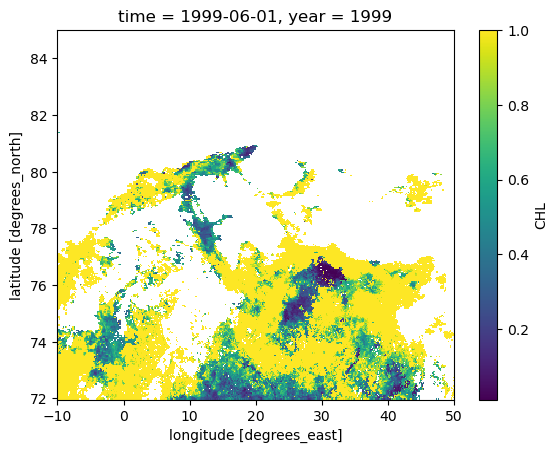

In [68]:
# map the 10 layero of standardized_chl
standardized_chl[10].plot()

In [70]:
ds

<xarray.Dataset>
Dimensions:    (time: 172, latitude: 313, longitude: 1441)
Coordinates:
  * latitude   (latitude) float32 84.98 84.94 84.9 84.85 ... 72.06 72.02 71.98
  * time       (time) datetime64[ns] 1998-03-01 1998-04-01 ... 2022-06-01
  * longitude  (longitude) float32 -10.02 -9.979 -9.938 ... 49.9 49.94 49.98
    year       (time) int64 1998 1998 1998 1998 1998 ... 2022 2022 2022 2022
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
    CHL_error  (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
    CHL_count  (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
Attributes: (12/42)
    contact:                                    email: cmems@pml.ac.uk
    Naming_authority:                           CMEMS
    start_time:                                 00:00:00 UTC
    stop_time:                                  23:59:00 UTC
    Conventions:                                CF-1.7
    FROM_ORIGINAL_FILE__Metadata_Conventions:   Unidata Dataset Discovery v1.0
    ...                                         ...
    creation_date:                              2022-12-05
    Creation_time:                              11:25:23 UTC
    _CoordSysBuilder:                           ucar.nc2.dataset.conv.CF1Conv...
    comment:                                    
    source:                                      
    history:                                    Data extracted from dataset h...

In [74]:

# Reshape the dataset to a 2D array (time x space)
data = ds['CHL'].values.reshape(ds.sizes['time'], -1)

# Replace NaN values with zeros
data[np.isnan(data)] = 0


/home/matzuc/miniconda3/envs/geo/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


In [86]:
ds

<xarray.Dataset>
Dimensions:    (time: 172, latitude: 313, longitude: 1441)
Coordinates:
  * latitude   (latitude) float32 84.98 84.94 84.9 84.85 ... 72.06 72.02 71.98
  * time       (time) datetime64[ns] 1998-03-01 1998-04-01 ... 2022-06-01
  * longitude  (longitude) float32 -10.02 -9.979 -9.938 ... 49.9 49.94 49.98
    year       (time) int64 1998 1998 1998 1998 1998 ... 2022 2022 2022 2022
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
    CHL_error  (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
    CHL_count  (time, latitude, longitude) float32 dask.array<chunksize=(7, 313, 1441), meta=np.ndarray>
Attributes: (12/42)
    contact:                                    email: cmems@pml.ac.uk
    Naming_authority:                           CMEMS
    start_time:                                 00:00:00 UTC
    stop_time:                                  23:59:00 UTC
    Conventions:                                CF-1.7
    FROM_ORIGINAL_FILE__Metadata_Conventions:   Unidata Dataset Discovery v1.0
    ...                                         ...
    creation_date:                              2022-12-05
    Creation_time:                              11:25:23 UTC
    _CoordSysBuilder:                           ucar.nc2.dataset.conv.CF1Conv...
    comment:                                    
    source:                                      
    history:                                    Data extracted from dataset h...

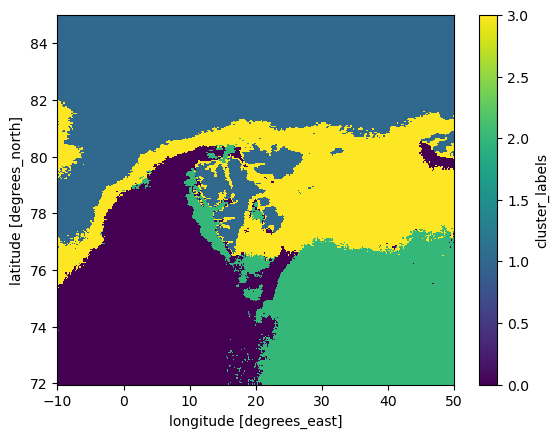

In [88]:

# Fit K-means clustering algorithm
n_clusters = 4 # number of clusters to create
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data.T)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the cluster labels to match the shape of the latitude and longitude coordinates
labels = labels.reshape(ds.sizes['latitude'], ds.sizes['longitude'])

# Create a new dataset with the cluster labels
ds_clustered = xr.Dataset(
    {'cluster_labels': (['latitude', 'longitude'], labels)},
    coords={'latitude': ds['latitude'], 'longitude': ds['longitude']}
)

# Plot the cluster labels on a map
ds_clustered['cluster_labels'].plot()

In [89]:
# Determine the optimal number of clusters using the elbow method
wss = []
for k in range(3, 13):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data.T)
    wss.append(kmeans.inertia_)

# Plot the WSS against k
plt.plot(range(3, 13), wss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

In [84]:

# Choose the optimal number of clusters and cluster the data
n_clusters = 5 # for example
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data.T)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the cluster labels to match the shape of the latitude and longitude coordinates
labels = labels.reshape(ds.sizes['latitude'], ds.sizes['longitude'])

# Create a new dataset with the cluster labels
ds_clustered = xr.Dataset(
    {'cluster_labels': (['latitude', 'longitude'], labels)},
    coords={'latitude': ds['latitude'], 'longitude': ds['longitude']}
)

# Plot the cluster labels on a map
ds_clustered['cluster_labels'].plot()

172

In [80]:
# size of kmeans
kmeans

KMeans(n_clusters=4, random_state=0)

In [ ]:

# Reshape the cluster labels to match the shape of the latitude and longitude coordinates
labels = kmeans.labels_.reshape(ds.sizes['latitude'], ds.sizes['longitude'])

# Create a new dataset with the cluster labels
ds_clustered = xr.Dataset(
    {'cluster_labels': (['latitude', 'longitude'], labels)},
    coords={'latitude': ds['latitude'], 'longitude': ds['longitude']}
)

# Plot the cluster labels on a map
ds_clustered['cluster_labels'].plot()

In [46]:
ds['CHL'] = ds['CHL'].astype(np.float64)
ds['CHL'].dims

('time', 'latitude', 'longitude')